# Non-Negative Matrix Factorization

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

## Load the data

In [2]:
data = pd.read_csv('./data/mirai/Mirai_dataset.csv', index_col=0, dtype=np.float32)
labels = pd.read_csv('./data/mirai/Mirai_labels.csv', dtype=np.int32)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 764136 entries, 1.0 to 764136.0
Columns: 115 entries, 1.0 to 0.0.54
dtypes: float32(115)
memory usage: 341.0 MB


In [4]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764136 entries, 0 to 764135
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       764136 non-null  int32
dtypes: int32(1)
memory usage: 2.9 MB


In [5]:
data.head(5)

,1.0,60.0,0.0,1.0.1,60.0.1,0.0.1,1.0.2,60.0.2,0.0.2,1.0.3,...,0.0.48,0.0.49,0.0.50,1.0.24,60.0.28,0.0.51,60.0.29,0.0.52,0.0.53,0.0.54
0,,,,,,,,,,,,,,,,,,,,,
1.0,1.999983,60.0,0.000000e+00,1.999990,60.0,9.094947e-13,1.999997,60.0,4.547474e-13,2.000000,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
2.0,1.000000,86.0,0.000000e+00,1.000000,86.0,0.000000e+00,1.000000,86.0,0.000000e+00,1.000000,...,0.0,0.0,0.0,1.0,86.0,0.0,86.0,0.0,0.0,0.0
3.0,1.999272,86.0,9.094947e-13,1.999563,86.0,0.000000e+00,1.999854,86.0,9.094947e-13,1.999985,...,0.0,0.0,0.0,1.0,86.0,0.0,86.0,0.0,0.0,0.0
4.0,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
5.0,1.000000,74.0,0.000000e+00,1.000000,74.0,0.000000e+00,1.000000,74.0,0.000000e+00,1.000000,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0


In [6]:
labels.head(5)

,0
0,0
1,0
2,0
3,0
4,0


In [7]:
data.describe()

,1.0,60.0,0.0,1.0.1,60.0.1,0.0.1,1.0.2,60.0.2,0.0.2,1.0.3,...,0.0.48,0.0.49,0.0.50,1.0.24,60.0.28,0.0.51,60.0.29,0.0.52,0.0.53,0.0.54
count,764136.000000,764136.000000,764136.000000,764136.000000,764136.000000,764136.000000,764136.000000,764136.000000,764136.000000,764136.000000,...,7.641360e+05,764136.000000,764136.000000,764136.000000,764136.000000,764136.000000,764136.000000,7.641360e+05,764136.000000,764136.000000
mean,62.350761,66.255043,70.099174,89.739113,66.271713,94.559898,240.175995,66.290672,143.849915,2317.251953,...,4.556563e+00,-0.000486,-0.000098,20698.412109,66.377167,0.237334,68.730598,5.130032e+00,0.004659,0.000091
std,44.615818,17.588593,1131.776489,59.838459,16.923904,1343.725586,141.576248,15.456532,1625.711792,1352.537231,...,7.694627e+01,0.649533,0.014717,13575.003906,19.792562,2.114585,23.244699,8.699055e+01,0.634564,0.009265
min,1.000000,42.000004,0.000000,1.000000,42.002373,0.000000,1.000000,44.291508,0.000000,1.000000,...,0.000000e+00,-65.889397,-1.057362,1.000000,42.000000,0.000000,42.000000,0.000000e+00,-73.598526,-0.749841
25%,7.951381,60.024849,0.236595,10.293426,60.051337,0.592575,22.328444,60.097115,1.363975,113.456554,...,1.818989e-12,0.000000,0.000000,158.586109,60.000000,0.000002,60.000000,3.637979e-12,0.000000,0.000000
50%,68.425091,60.078346,0.783348,100.562263,60.110451,1.338655,298.392960,60.135586,1.999527,3127.492188,...,6.366463e-12,0.000000,0.000000,30562.675781,60.000000,0.000004,60.000000,1.682565e-11,0.000000,0.000000
75%,103.520470,60.745066,2.929853,142.195202,60.586356,3.576463,344.376740,61.130436,3.531308,3177.945557,...,1.409717e-11,0.000000,0.000000,30737.931641,60.000000,0.000007,72.000000,4.501999e-11,0.000000,0.000000
max,144.071655,624.117432,442869.250000,195.788055,590.000000,400508.593750,425.179962,590.000000,265238.687500,3282.664307,...,1.455177e+04,92.778946,0.800243,30875.636719,1468.000000,130.141937,1468.000000,1.693692e+04,102.044060,0.875271


## Scale the data

In [8]:
# scale the data
scaler = pp.MinMaxScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data)
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
count,764136.000000,764136.000000,7.641360e+05,764136.000000,764136.000000,764136.000000,764136.000000,764136.000000,764136.000000,764136.000000,...,7.641360e+05,764136.000000,764136.000000,764136.000000,764136.000000,7.641360e+05,764136.000000,7.641360e+05,764136.000000,764136.000000
mean,0.428811,0.041667,1.582842e-04,0.455567,0.044287,0.000236,0.563855,0.040313,0.000542,0.705816,...,3.131279e-04,0.415262,0.569154,0.670369,0.017095,1.823654e-03,0.018745,3.028905e-04,0.419051,0.461465
std,0.311842,0.030215,2.555554e-03,0.307198,0.030883,0.003355,0.333765,0.028324,0.006129,0.412150,...,5.287761e-03,0.004094,0.007923,0.439681,0.013880,1.624830e-02,0.016301,5.136148e-03,0.003613,0.005701
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,0.048587,0.030964,5.342331e-07,0.047710,0.032936,0.000001,0.050282,0.028963,0.000005,0.034268,...,1.250013e-16,0.415265,0.569207,0.005104,0.012623,1.465591e-08,0.012623,2.147957e-16,0.419024,0.461409
50%,0.471268,0.031056,1.768802e-06,0.511131,0.033044,0.000003,0.701101,0.029034,0.000008,0.952715,...,4.375045e-16,0.415265,0.569207,0.989864,0.012623,3.151873e-08,0.012623,9.934302e-16,0.419024,0.461409
75%,0.716567,0.032202,6.615615e-06,0.724866,0.033913,0.000009,0.809507,0.030857,0.000013,0.968090,...,9.687599e-16,0.415265,0.569207,0.995540,0.012623,5.155674e-08,0.021038,2.658097e-15,0.419024,0.461409
max,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000


## Train-Test Split

In [9]:
# drop the last row
#labels=labels[:-1]
#labels.tail(5)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, shuffle=False, test_size=0.3)

In [11]:
print(f'Number anomalies in train data: {y_train.sum()}')

Number anomalies in train data: 0    413275
dtype: int64


In [12]:
print(f'Number anomalies in test data: {y_test.sum()}')

Number anomalies in test data: 0    229241
dtype: int64


## Train NMF

In [13]:
# create and fit pca
nmf = NMF(n_components=23, max_iter=100)
nmf.fit(X_train)
train_nmf = nmf.transform(X_train)

/home/alex/MySci/anomaly/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/alex/MySci/anomaly/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(


In [14]:
inverse_train = nmf.inverse_transform(train_nmf)

In [15]:
def reconstr_error(original, reconstr):
    errors = np.sqrt(np.sum((original - reconstr)**2, axis=1))
    return errors

In [16]:
errors = reconstr_error(X_train, inverse_train)

In [17]:
# average precision score train
aps_train = average_precision_score(y_train, errors)
print(f'Average precision score for train: {aps_train:.4f}')

Average precision score for train: 0.6436


## Test NMF

In [18]:
test_nmf = nmf.transform(X_test)
inverse_test = nmf.inverse_transform(test_nmf)

/home/alex/MySci/anomaly/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(


In [19]:
test_errors = reconstr_error(X_test, inverse_test)

In [20]:
# average precision score test
aps_test = average_precision_score(y_test, test_errors)
print(f'Average precision score for test: {aps_test:.4f}')

Average precision score for test: 1.0000


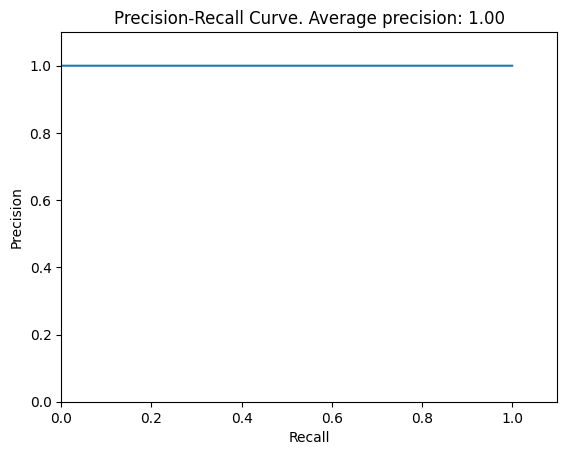

In [21]:
# precision-recall curve for test results
precision, recall, thresholds = precision_recall_curve(y_test, test_errors)
plt.title(f'Precision-Recall Curve. Average precision: {aps_test:.2f}')
plt.xlabel('Recall')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('Precision')
#plt.ylim([0, 1.1])
#plt.xlim([0, 1.0])
plt.plot(recall, precision)
plt.show()

/home/alex/MySci/anomaly/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1009: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


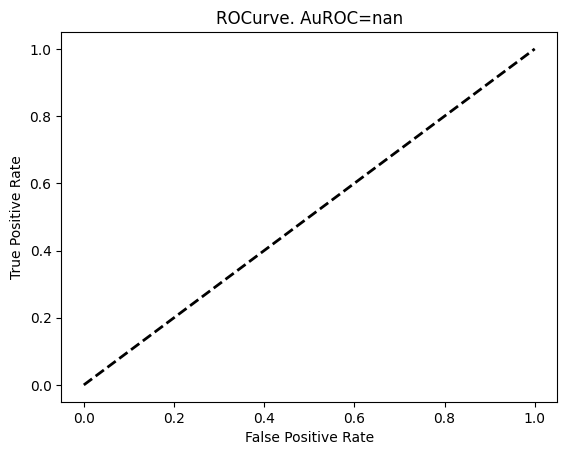

In [22]:
# receiver operational characteristic
fpr, tpr, thresholds = roc_curve(y_test, test_errors)
auROC = auc(fpr, tpr)
plt.figure()
plt.title(f'ROCurve. AuROC={auROC:.2f}')
plt.plot(fpr, tpr, color='r', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1], [0,1], color='k', lw=2, linestyle='--')
plt.show()